## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as sns
plt.style.use('fivethirtyeight')

## Data Reading and preprocessing

In [3]:
data=pd.read_csv('../dataset/Seethaeliya1.csv')
##importing the data

data.head()
##watching head values of dataset

,Date,T_Max,T_Min,RH_1,RH_2,Wind_speed,sunshine_hours,rainfall,evaporation
0,1/1/2016,16.8,12.4,100.0,98.0,13.75,0.0,8.5,1.16
1,1/2/2016,16.2,11.4,98.0,98.0,6.66,3.0,2.3,0.97
2,1/3/2016,18.8,12.0,92.0,98.0,5.92,5.8,0.0,1.58
3,1/4/2016,19.8,12.6,94.0,94.0,4.63,7.1,0.0,1.84
4,1/5/2016,20.2,14.8,96.0,74.0,5.52,10.4,0.2,1.47


In [4]:
data.shape
##the shape of the dataset

(2192, 9)

In [5]:
##converting date and time
data['Date']=pd.to_datetime(data['Date'])

In [6]:
data.dtypes

Date              datetime64[ns]
T_Max                     object
T_Min                    float64
RH_1                     float64
RH_2                     float64
Wind_speed               float64
sunshine_hours           float64
rainfall                 float64
evaporation              float64
dtype: object

In [7]:
##We will need to remove the T_max feature because there are so much null values
##remove the T_Max column
data=data.drop(['T_Max'],axis=1)

In [8]:
data.set_index('Date',inplace=True) ##indexing

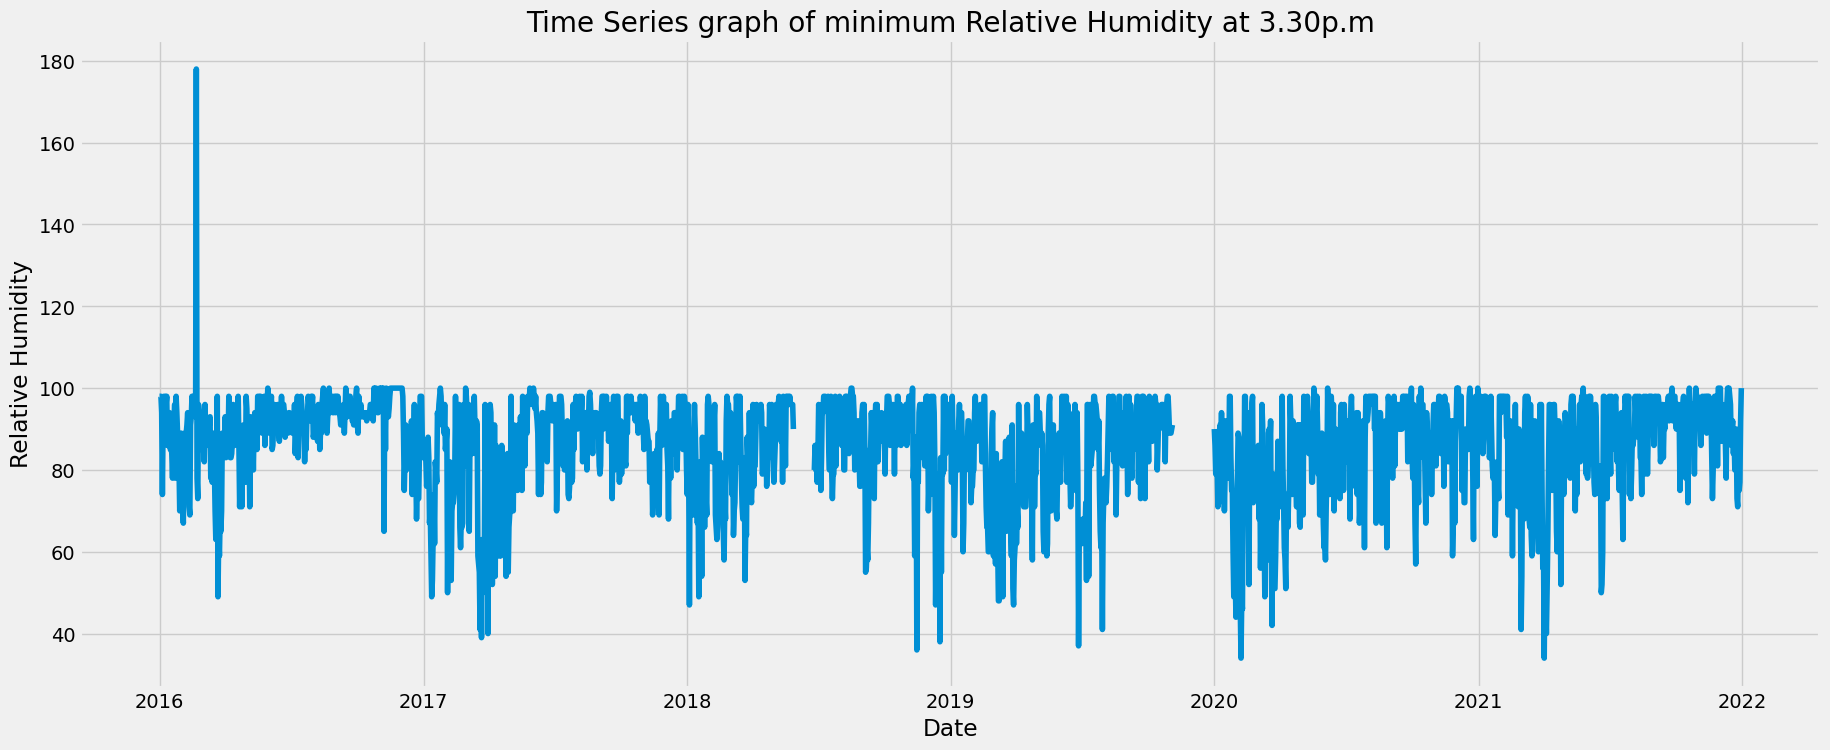

In [10]:
##time series plot of minimum rh1
plt.figure(figsize=(20,8))
plt.plot(data['RH_2'])
plt.title('Time Series graph of minimum Relative Humidity at 3.30p.m')
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.show()

In [11]:
data.head()

,T_Min,RH_1,RH_2,Wind_speed,sunshine_hours,rainfall,evaporation
Date,,,,,,,
2016-01-01,12.4,100.0,98.0,13.75,0.0,8.5,1.16
2016-01-02,11.4,98.0,98.0,6.66,3.0,2.3,0.97
2016-01-03,12.0,92.0,98.0,5.92,5.8,0.0,1.58
2016-01-04,12.6,94.0,94.0,4.63,7.1,0.0,1.84
2016-01-05,14.8,96.0,74.0,5.52,10.4,0.2,1.47


In [16]:
##create a new dataframe with only the RH_2 column
data3=data.filter(['RH_2'])
data3=data3.interpolate() ##handle null values with linear interpolation
##convert the dataframe into a numpy array
dataset3=data3.values
##get the number of rows to train the model
train_data_len=math.ceil(len(dataset3)*.8)

train_data_len

1754

In [17]:
data3

,RH_2
Date,
2016-01-01,98.0
2016-01-02,98.0
2016-01-03,98.0
2016-01-04,94.0
2016-01-05,74.0
...,...
2021-12-27,84.0
2021-12-28,75.0
2021-12-29,77.0


In [18]:
data3.apply(pd.isnull).sum() ##check null values after interpolation

RH_2    0
dtype: int64

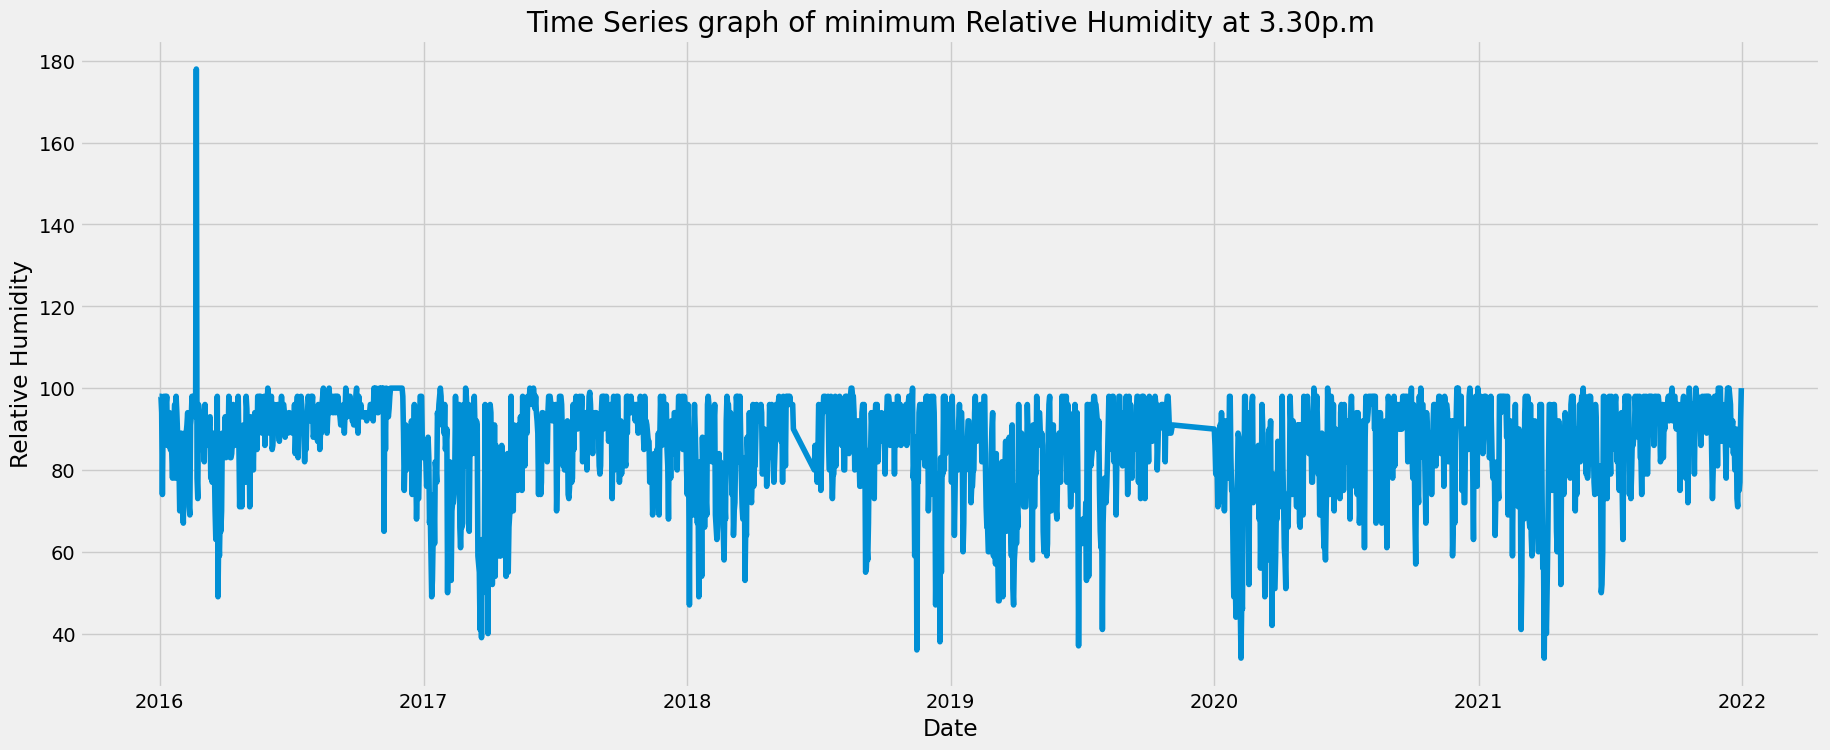

In [19]:
##time series plot of minimum rh2
plt.figure(figsize=(20,8))
plt.plot(data3['RH_2'])
plt.title('Time Series graph of minimum Relative Humidity at 3.30p.m')
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.show()

In [21]:
##Scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
sc=scaler.fit_transform(dataset3)
sc

array([[0.44444444],
       [0.44444444],
       [0.44444444],
       ...,
       [0.29861111],
       [0.40277778],
       [0.45833333]])

In [22]:
#Create the training data set
##create the scaled training data set
train_data=sc[0:train_data_len,:]
##split the data into x_train and y_train data sets

x_train=[] ##features
y_train=[] ##target

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.44444444, 0.44444444, 0.44444444, 0.41666667, 0.27777778,
       0.40277778, 0.44444444, 0.44444444, 0.44444444, 0.43055556,
       0.44444444, 0.36111111, 0.36805556, 0.36111111, 0.41666667,
       0.35416667, 0.36111111, 0.34722222, 0.30555556, 0.36805556,
       0.39583333, 0.43055556, 0.30555556, 0.44444444, 0.41666667,
       0.38194444, 0.38194444, 0.32638889, 0.25      , 0.28472222,
       0.38194444, 0.25694444, 0.26388889, 0.22916667, 0.35416667,
       0.38194444, 0.32638889, 0.38194444, 0.39583333, 0.41666667,
       0.36805556, 0.25694444, 0.24305556, 0.39583333, 0.40972222,
       0.44444444, 0.43055556, 0.44444444, 0.44444444, 0.41666667,
       0.40972222, 1.        , 0.30555556, 0.27083333, 0.43055556,
       0.41666667, 0.36111111, 0.41666667, 0.36111111, 0.41666667])]
[0.3611111111111111]



In [23]:
##convert train sets to numpyarrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train
y_train
##here we have 2d array
##but dealing with LSTM we need to have 3d array
##therefore it is needed to reshape the data

array([0.36111111, 0.35416667, 0.33333333, ..., 0.34027778, 0.375     ,
       0.29861111])

In [24]:
##reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1694, 60, 1)

## Model Building

In [25]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,activation='relu',return_sequences=False))
model.add(Dense(25,activation='relu'))
model.add(Dense(1))

#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

##train the model
history = model.fit(x_train,y_train,epochs=10,batch_size=1)

Epoch 1/10
1694/1694 [==============================] - 34s 19ms/step - loss: 0.0068
Epoch 2/10
1694/1694 [==============================] - 32s 19ms/step - loss: 0.0056
Epoch 3/10
1694/1694 [==============================] - 31s 19ms/step - loss: 0.0050
Epoch 4/10
1694/1694 [==============================] - 31s 18ms/step - loss: 0.0048
Epoch 5/10
1694/1694 [==============================] - 31s 19ms/step - loss: 0.0046
Epoch 6/10
1694/1694 [==============================] - 31s 19ms/step - loss: 0.0046
Epoch 7/10
1694/1694 [==============================] - 31s 18ms/step - loss: 0.0045
Epoch 8/10
1694/1694 [==============================] - 31s 19ms/step - loss: 0.0045
Epoch 9/10
1694/1694 [==============================] - 32s 19ms/step - loss: 0.0045
Epoch 10/10
1694/1694 [==============================] - 32s 19ms/step - loss: 0.0044


Text(0.5, 1.0, 'Model Accuracy')

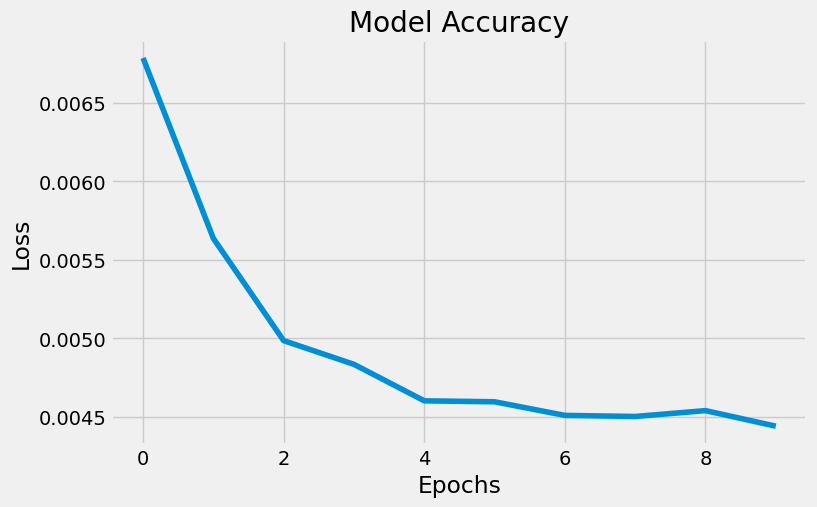

In [26]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Accuracy")

In [27]:
##create the testing dataset
##create a new array containing scaled values from index 1694 to 2192
test_data=sc[train_data_len-60:,:]
##Create data set x_test and y_test
x_test=[]
y_test=dataset3[train_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [28]:
##convert the data into numpy array
x_test=np.array(x_test)

In [29]:
##reshape the dataset
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [30]:
##get the models predicted relative humidities
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions) ##unscaling


14/14 [==============================] - 1s 14ms/step


In [31]:
##calculate RMSE
##lower the RMSE higher the accuracy
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

10.699143095162324

C:\Users\Chalaka\AppData\Local\Temp\ipykernel_9540\1954654578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['Predictions']=predictions


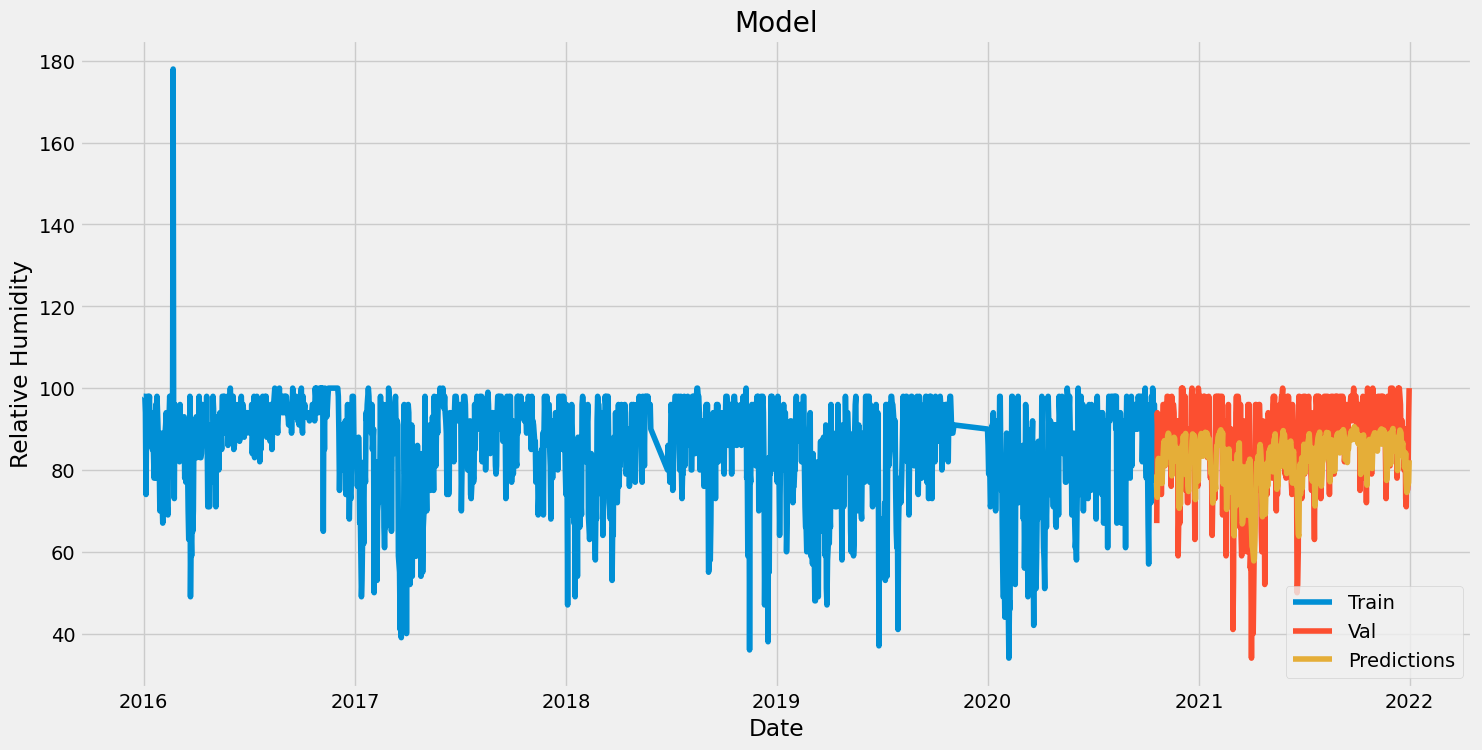

In [33]:
##plot the data
train=data3[:train_data_len]
validation_data=data3[train_data_len:]
validation_data['Predictions']=predictions

##visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.plot(train['RH_2'])
plt.plot(validation_data[['RH_2','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

## Prediction for the next day Relative Humidity at 3.30 p.m

In [34]:
##get the quote
data3_quote=pd.read_csv('../dataset/Seethaeliya1.csv')

In [35]:
data3_quote.set_index('Date',inplace=True)

In [36]:
##create a new dataframe
new_data3=data3_quote.filter(['RH_2'])
##get the last 60 day relative humidity and convert the dataframe to an array
last_60=new_data3[-60:].values
##scale the data between 0 and 1
sc_last_60=scaler.transform(last_60)
##Create an empty list
X_test=[]
##Append the past days
X_test.append(sc_last_60)
##convert the X_test data to numpy array
X_test=np.array(X_test)
##reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
##Get the predicted scaled relative humidity
pred_rh2=model.predict(X_test)
##undo the scaling
pred_rh2=scaler.inverse_transform(pred_rh2)
print(pred_rh2) ##Relative HUmidity for 2022-01-01

1/1 [==============================] - 0s 31ms/step
[[86.67792]]


In [1]:
##actual value ==94